## Imports

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## data loading

In [12]:
file_path = "ai4i2020.csv"
data = pd.read_csv(file_path)

In [13]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0


In [14]:
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

In [15]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,2,298.1,308.6,1551,42.8,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0


In [22]:
X = data.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)

In [23]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [19]:
y = data['Machine failure']

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [26]:
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_predict = decision_tree.predict(X_test)

In [29]:
report = classification_report(y_test,y_predict)

In [30]:
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      2907\n           1       0.64      0.73      0.68        93\n\n    accuracy                           0.98      3000\n   macro avg       0.82      0.86      0.84      3000\nweighted avg       0.98      0.98      0.98      3000\n'

In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2907
           1       0.64      0.73      0.68        93

    accuracy                           0.98      3000
   macro avg       0.82      0.86      0.84      3000
weighted avg       0.98      0.98      0.98      3000



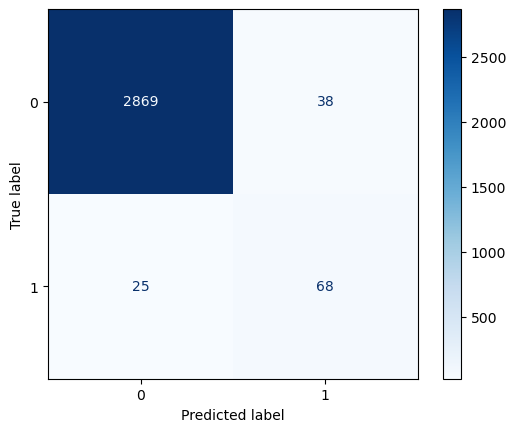

In [34]:
cm = confusion_matrix(y_test,y_predict)
disp= ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.show()